In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("C://Users//VARSHINI//Downloads//archive (1)//creditcard.csv")

In [3]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
data=data.sample(frac=0.1,random_state=42)
print(data.shape)
print(data.describe())

(28481, 31)
                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94878.522664     -0.007086     -0.002514      0.004905      0.003783   
std     47490.564834      1.978423      1.672097      1.536368      1.418356   
min         0.000000    -34.148234    -48.060856    -33.680984     -5.560118   
25%     54354.000000     -0.921109     -0.598966     -0.888363     -0.846227   
50%     84628.000000      0.013240      0.065459      0.185381     -0.024544   
75%    139343.000000      1.315782      0.801249      1.044630      0.739501   
max    172782.000000      2.393578     18.902453      9.382558     12.699542   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean      -0.001955     -0.003035     -0.004552     -0.000183     -0.006977   
std        1.367306      1.317

In [6]:
Fraud=data[data['Class']==1]
Valid=data[data['Class']==0]
out_frac=len(Fraud)/float(len(Valid))
print(out_frac)

0.001617724635132759


In [8]:
print('Fraud Cases: {}'.format(len(data[data['Class']==1])))
print('Valid Transactions: {}'.format(len(data[data['Class']==0])))

Fraud Cases: 46
Valid Transactions: 28435


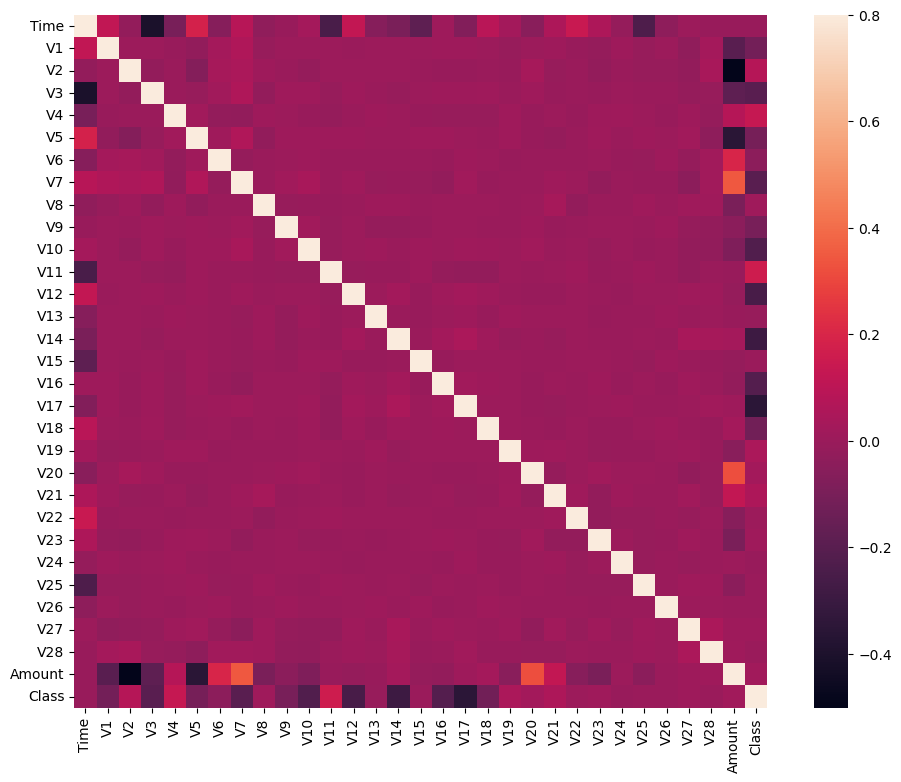

In [9]:
matrix=data.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(matrix,vmax=.8,square=True)
plt.show()

In [10]:
columns=data.columns.tolist()
columns=[c for c in columns if c not in ["Class"]]
target="Class"
X=data[columns]
Y=data[target]
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [11]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
state=1
classifiers={
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=out_frac,
                                        random_state=state),
    "Local Outlier Factor":LocalOutlierFactor(
        n_neighbors=20,
        contamination=out_frac)}


In [16]:
plt.figure(figsize=(9,7))
n_outliers=len(Fraud)
for i,(clf_name,clf) in enumerate(classifiers.items()):
    if clf_name=="Local Outlier Factor":
        y_pred=clf.fit_predict(X)
        score_pred=clf.negative_outlier_factor_
    else:
        clf.fit(X)
        score_pred=clf.decision_function(X)
        y_pred=clf.predict(X)
    y_pred[y_pred==1]=0
    y_pred[y_pred==-1]=1
    n_errors=(y_pred!=Y).sum()
    print('{}:{}'.format(clf_name,n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))

C:\Users\VARSHINI\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest:63
0.9977879990168884
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28435
           1       0.32      0.33      0.32        46

    accuracy                           1.00     28481
   macro avg       0.66      0.66      0.66     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor:91
0.9968048874688389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28435
           1       0.02      0.02      0.02        46

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



<Figure size 900x700 with 0 Axes>